# Regression Estimator

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import numpy as np

# preprocess the data - create scaler...
# scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# import the regressor
from sklearn.linear_model._base import LinearRegression
from sklearn.linear_model._coordinate_descent import Lasso
from sklearn.linear_model._coordinate_descent import LinearModel

from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

ran_seed = 42

# to suppress the annoying warning when running pyplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Prepare Data
* Perform EDA
* Handle Missing Data (Remove or Impute)
* Identify Target Data
* Scale the Data
* Encode any Text Data (Categorical Data)

In [2]:
data = pd.read_csv("./penguins_size_clean.csv")

In [3]:
data.head()
# will encode species, island and text..
# What is unique about numerical features: SAME UNIT OF MEASURE for one with mm

# Below made the code stop working, couldnt make graphs...
# data.columns = ['species', 'island', 'bill_length', 'bill_depth',
#       'bill_length', 'body_mass', 'sex']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


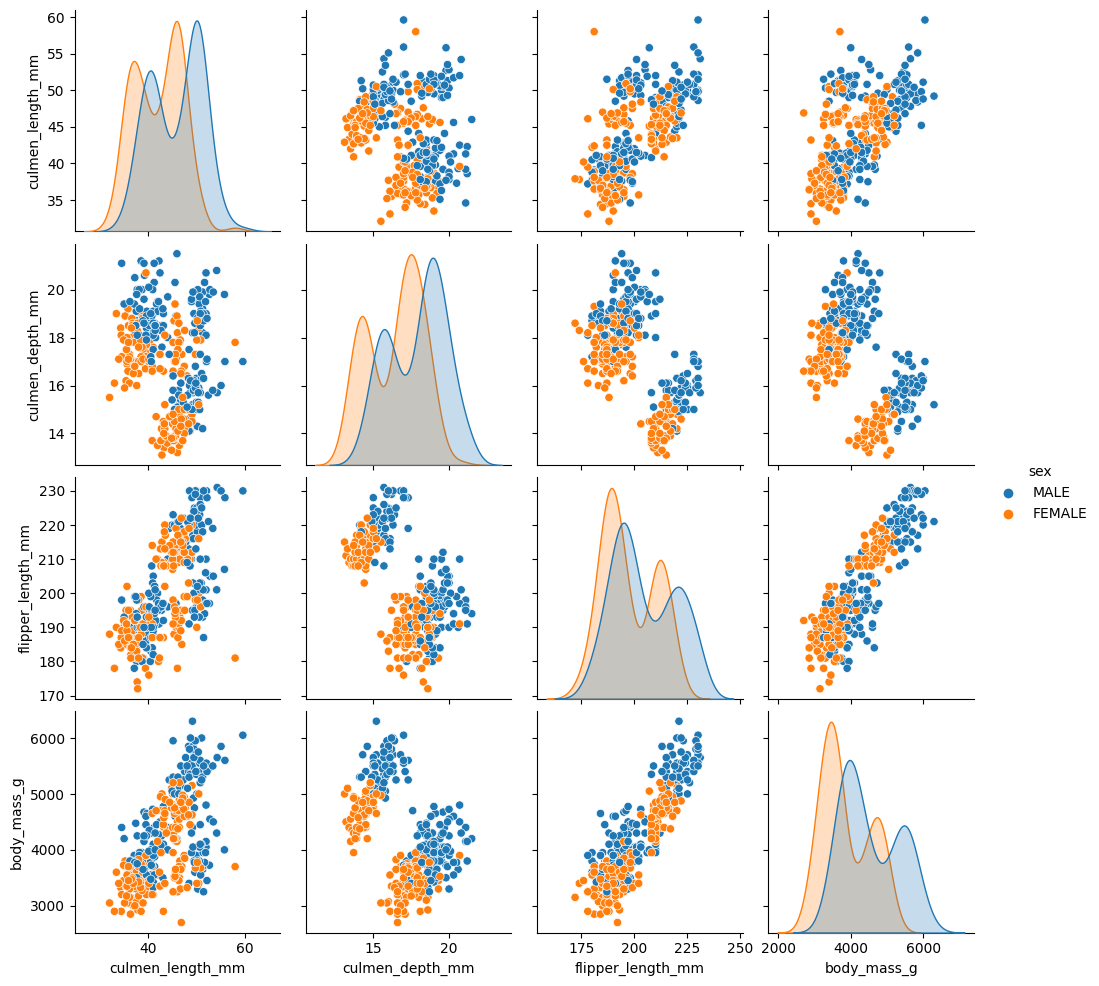

In [5]:
sns.pairplot(data, diag_kind='kde', hue='sex')

<Axes: xlabel='species', ylabel='body_mass_g'>

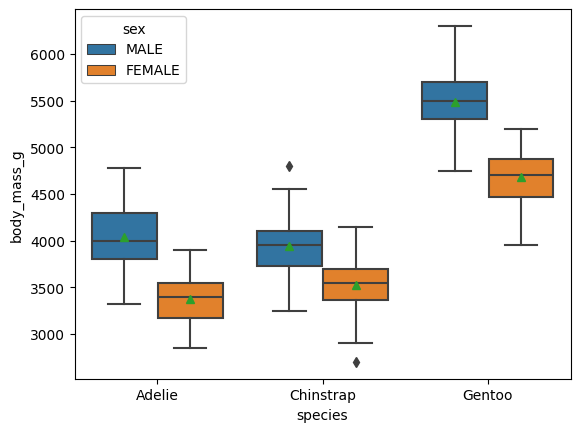

In [10]:
sns.boxplot(data=data, x='species', y='body_mass_g', hue='sex', showmeans =True)

In [ ]:
# predicting for body mass (Meaning that will be the target) Target = Y variable

In [33]:
type(data)

pandas.core.frame.DataFrame

### Handle Missing Data

In [ ]:
# No missing data in the dataset

In [11]:
df = data.copy()
df.shape

(333, 7)

In [13]:
y_temp = df['body_mass_g']

In [14]:
# Sales is what you want to do prediction on. So drop to isolate it
X_tmp = df.drop(['body_mass_g'], axis=1)
X_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   sex                333 non-null    object 
dtypes: float64(3), object(3)
memory usage: 15.7+ KB


### Scale the Data

In [15]:
# prep data for scaling and encoding
X_tmp_text = X_tmp.select_dtypes(include = ['object'])
X_tmp_numeric = X_tmp.select_dtypes(exclude = ['object'])

In [16]:
# preprocess the data - create scaler...
# STANDARD scale
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(X_tmp_numeric)
scaled_numeric

array([[-8.96041890e-01,  7.80732104e-01, -1.42675157e+00],
       [-8.22787867e-01,  1.19583967e-01, -1.06947358e+00],
       [-6.76279821e-01,  4.24729261e-01, -4.26373194e-01],
       [-1.33556603e+00,  1.08587740e+00, -5.69284390e-01],
       [-8.59414878e-01,  1.74702554e+00, -7.83651184e-01],
       [-9.32668901e-01,  3.23014163e-01, -1.42675157e+00],
       [-8.77728384e-01,  1.23845005e+00, -4.26373194e-01],
       [-5.29771775e-01,  2.21299065e-01, -1.35529597e+00],
       [-9.87609419e-01,  2.05217083e+00, -7.12195586e-01],
       [-1.72014965e+00,  2.00131328e+00, -2.12006399e-01],
       [-1.35387953e+00,  3.23014163e-01, -1.14092917e+00],
       [-9.69295913e-01,  9.33304752e-01, -4.26373194e-01],
       [-2.73382694e-01,  1.79788309e+00, -2.83461997e-01],
       [-1.75677666e+00,  6.28159457e-01, -1.21238477e+00],
       [ 3.67590007e-01,  2.20474348e+00, -4.97828792e-01],
       [-1.13411746e+00,  5.77301908e-01, -1.92694075e+00],
       [-1.15243097e+00,  7.80732104e-01

In [17]:
# SCALE DATA
df_scaled_numeric = pd.DataFrame(scaled_numeric)
df_scaled_numeric.columns = X_tmp_numeric.columns
df_scaled_numeric

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,-0.896042,0.780732,-1.426752
1,-0.822788,0.119584,-1.069474
2,-0.676280,0.424729,-0.426373
3,-1.335566,1.085877,-0.569284
4,-0.859415,1.747026,-0.783651
...,...,...,...
328,0.587352,-1.762145,0.931283
329,0.514098,-1.457000,1.002739
330,1.173384,-0.744994,1.502928
331,0.221082,-1.202712,0.788372


### Encode the Data

In [19]:
# encode any text features that will be features
df_scaled_text = pd.get_dummies(X_tmp_text, drop_first=True)
df_scaled_text

,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,False,False,False,True,True
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,True
...,...,...,...,...,...
328,False,True,False,False,False
329,False,True,False,False,False
330,False,True,False,False,True
331,False,True,False,False,False


In [20]:
df_final = pd.concat([df_scaled_text, df_scaled_numeric], axis=1)
df_final

,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,False,False,False,True,True,-0.896042,0.780732,-1.426752
1,False,False,False,True,False,-0.822788,0.119584,-1.069474
2,False,False,False,True,False,-0.676280,0.424729,-0.426373
3,False,False,False,True,False,-1.335566,1.085877,-0.569284
4,False,False,False,True,True,-0.859415,1.747026,-0.783651
...,...,...,...,...,...,...,...,...
328,False,True,False,False,False,0.587352,-1.762145,0.931283
329,False,True,False,False,False,0.514098,-1.457000,1.002739
330,False,True,False,False,True,1.173384,-0.744994,1.502928
331,False,True,False,False,False,0.221082,-1.202712,0.788372


## Select the Target Data and Independent Variables (i.e. X)
* Create an array of the target data
* Select the features to be used for prediction
* Create a 2d array (or DF) of the selected features for the X Matrix

In [21]:
y = y_temp

In [22]:
X = df_final
X.head()

,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,False,False,False,True,True,-0.896042,0.780732,-1.426752
1,False,False,False,True,False,-0.822788,0.119584,-1.069474
2,False,False,False,True,False,-0.676280,0.424729,-0.426373
3,False,False,False,True,False,-1.335566,1.085877,-0.569284
4,False,False,False,True,True,-0.859415,1.747026,-0.783651


## Prepare the Model

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((223, 8), (110, 8), (223,), (110,))

## Create the Model

In [25]:
lr_reg = LinearRegression(n_jobs=-1)
# above improves the speed of model, this example is only 300 odd rows, not worth it.
# Pat uses N_jobs a lot

In [26]:
lr_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [27]:
preds_train = lr_reg.predict(X_train)
#preds_train

In [28]:
lr_reg.score(X_train, y_train)

0.8681895232024185

In [36]:
df_train = X_train
df_train['prediction'], df_train['actual'] = preds_train, y_train
df_train

,TV_Low,TV_Medium,Influencer_Mega,Influencer_Micro,Influencer_Nano,Radio,Social Media,prediction,actual
172,True,False,True,False,False,0.091738,0.011466,77.701842,90.181678
414,False,False,False,True,False,0.768012,0.720869,312.815972,347.693601
56,True,False,False,True,False,0.257423,0.119646,99.411493,99.998235
274,False,True,True,False,False,0.527134,0.296289,211.658371,156.920877
388,False,False,True,False,False,0.665835,0.423198,299.062607,353.003223
...,...,...,...,...,...,...,...,...,...
71,False,False,False,False,True,0.722694,0.518738,304.988044,315.205890
106,False,True,False,True,False,0.381044,0.166483,193.622580,185.048765
270,True,False,False,False,False,0.189362,0.234796,89.146027,91.567497
435,False,True,False,False,True,0.371370,0.273909,190.504512,197.731274


### Run model against the test set

In [29]:
preds_test = lr_reg.predict(X_test)

In [30]:
lr_reg.score(X_test, y_test)
# R SQ sxore below I believe...

0.8854062877051314

In [31]:
X_test['Prediction'] = preds_test
X_test['Actual'] = y_test

In [32]:
X_test

,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE,culmen_length_mm,culmen_depth_mm,flipper_length_mm,Prediction,Actual
25,False,False,True,False,False,-0.822788,-0.236419,-1.641118,3212.513402,3250.0
309,False,True,False,False,False,0.532412,-1.304427,1.502928,4936.719574,4875.0
73,False,False,False,True,True,-0.346637,0.984162,-0.426373,3992.715707,4000.0
195,True,False,True,False,False,1.063503,0.068726,-0.212006,3526.715165,3675.0
57,False,False,False,False,True,-0.529772,0.526444,-0.640740,3931.135846,4050.0
...,...,...,...,...,...,...,...,...,...,...
10,False,False,False,True,False,-1.353880,0.323014,-1.140929,3260.194369,3700.0
225,False,True,False,False,True,0.916995,-0.541564,1.074194,5345.379436,5550.0
227,False,True,False,False,True,0.807114,-1.304427,0.859828,5173.002033,5850.0
81,False,False,True,False,False,-1.298939,0.729875,-0.855107,3501.078550,3500.0


In [37]:
r2_score(y_test, preds_test), mean_squared_error(y_test, preds_test), rmse, mean_absolute_error(y_test, preds_test)

(0.8854062877051314, 71024.2831776597, 208.0089703931956)

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, preds_test))
# Taking SQ Root of the value above 
rmse

266.5038145649321

In [43]:
np.median(y_temp), np.mean(y_temp), np.std(y_temp), np.min(y_temp), np.max(y_temp), np.max(y_temp) - np.min(y_temp)

(4050.0, 4207.057057057057, 804.005860159563, 2700.0, 6300.0, 3600.0)

In [44]:
r2_score(y_test, preds_test), mean_squared_error(y_test, preds_test), rmse, mean_absolute_error(y_test, preds_test)

(0.8854062877051314, 71024.2831776597, 266.5038145649321, 208.0089703931956)

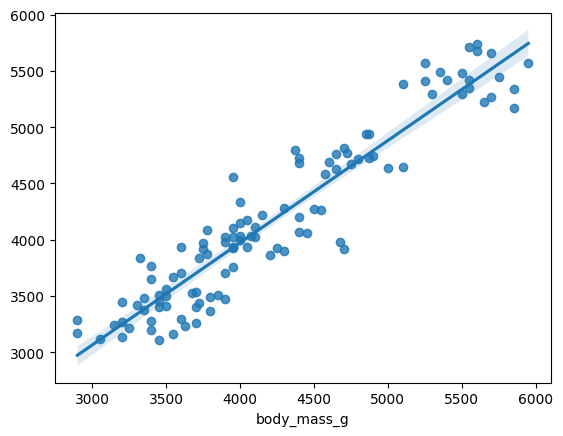

In [46]:
sns.regplot(x=y_test, y=preds_test);

<Axes: xlabel='body_mass_g', ylabel='body_mass_g'>

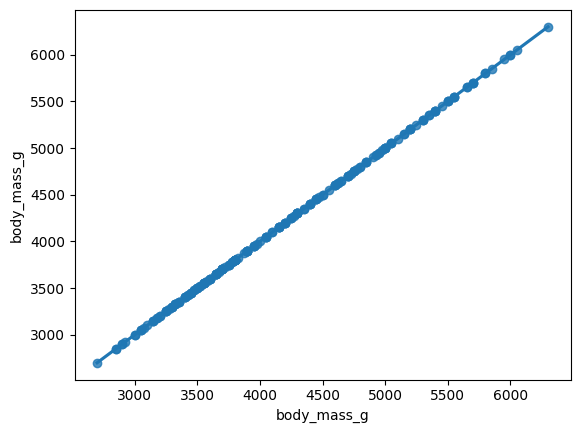

In [47]:
sns.regplot(x=y_train, y=y_train)

<Axes: xlabel='body_mass_g', ylabel='Count'>

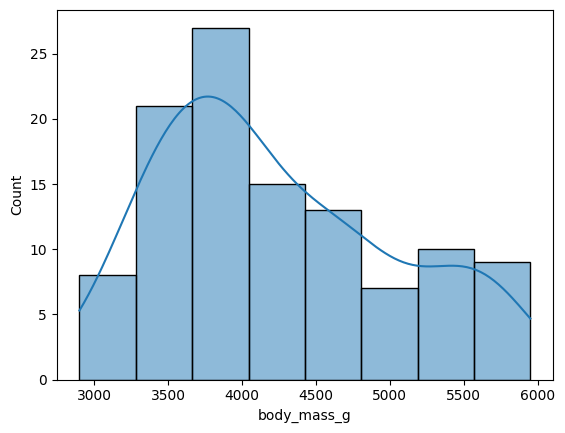

In [48]:
sns.histplot(x=y_test, kde=True)

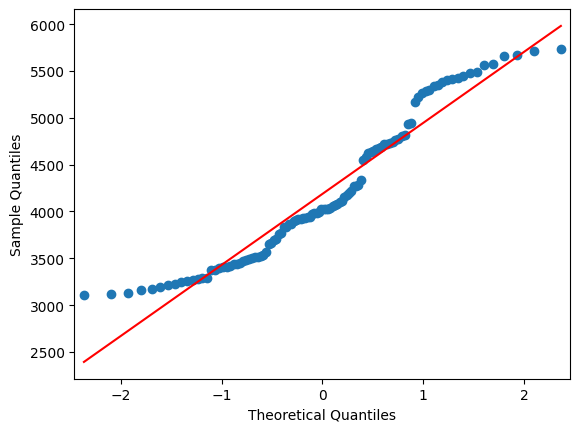

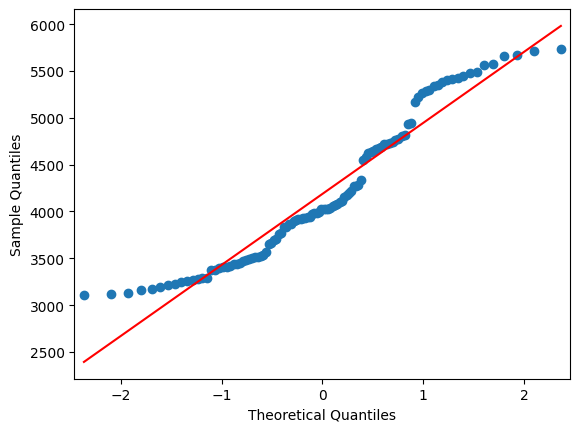

In [50]:
sm.qqplot(preds_test, line='s')

# CROSSVALIDATION on LR Model

In [58]:
# K fold cross validation
scores = cross_val_score(lr_reg, X_test, y_test, cv=20, scoring='r2')
print('Cross-validation scores: ', scores)
print('AVG Cross-validation scores: ', scores.mean())

Cross-validation scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
AVG Cross-validation scores:  1.0


In [59]:
# K fold cross validation
scores = cross_val_score(lr_reg, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
print('Cross-validation scores: ', scores)
print('AVG Cross-validation scores: ', scores.mean())

Cross-validation scores:  [-2.06795153e-25 -4.69988984e-25 -3.75991188e-25 -1.50396475e-25
 -3.19592509e-25 -2.25594713e-25 -1.87995594e-25 -7.14383256e-25
 -2.06795153e-25 -3.19592509e-25]
AVG Cross-validation scores:  -3.1771255345786745e-25
